# 📊 Exploración Inicial del Dataset - Scoring Crediticio

Este notebook contiene el análisis exploratorio del dataset `Give Me Some Credit` obtenido de Kaggle.

- **Objetivo**: Analizar la información contenida, identificar patrones y preparar el dataset para entrenamiento.


In [21]:
# 🔽 Cargar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo de gráficos
sns.set(style='whitegrid')

In [22]:
# 📂 Cargar datos
df = pd.read_csv('../data/cs-training.csv', index_col=0)
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [26]:
print(df.columns.tolist())


['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']


In [23]:
# 📋 Información general
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtypes: fl

In [24]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [27]:
# ❓ Valores nulos por columna
df.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [20]:
df['NumberOfDependents'].value_counts()


NumberOfDependents
0.0     86902
1.0     26316
2.0     19522
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
10.0        5
9.0         5
20.0        1
13.0        1
Name: count, dtype: int64

Conteo de clases:
SeriousDlqin2yrs
0    139974
1     10026
Name: count, dtype: int64

Porcentaje de cada clase:
SeriousDlqin2yrs
0    93.316
1     6.684
Name: proportion, dtype: float64


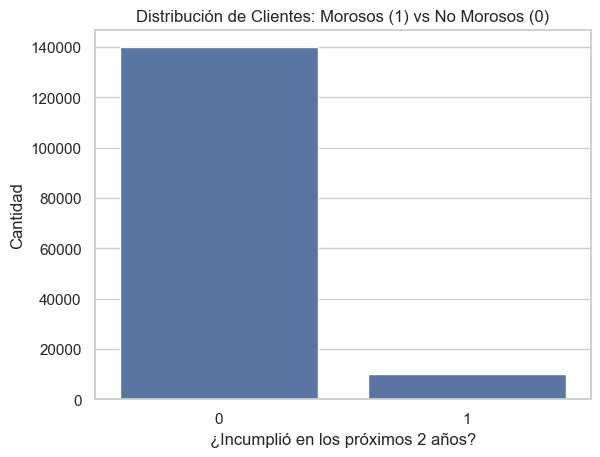

In [17]:
## Distribución de clases y visualización
# 📊 Frecuencia absoluta y relativa de la variable objetivo
print("Conteo de clases:")
print(df['SeriousDlqin2yrs'].value_counts())

print("\nPorcentaje de cada clase:")
print(df['SeriousDlqin2yrs'].value_counts(normalize=True) * 100)

# 📊 Gráfico de barras
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='SeriousDlqin2yrs')
plt.title('Distribución de Clientes: Morosos (1) vs No Morosos (0)')
plt.xlabel('¿Incumplió en los próximos 2 años?')
plt.ylabel('Cantidad')
plt.show()


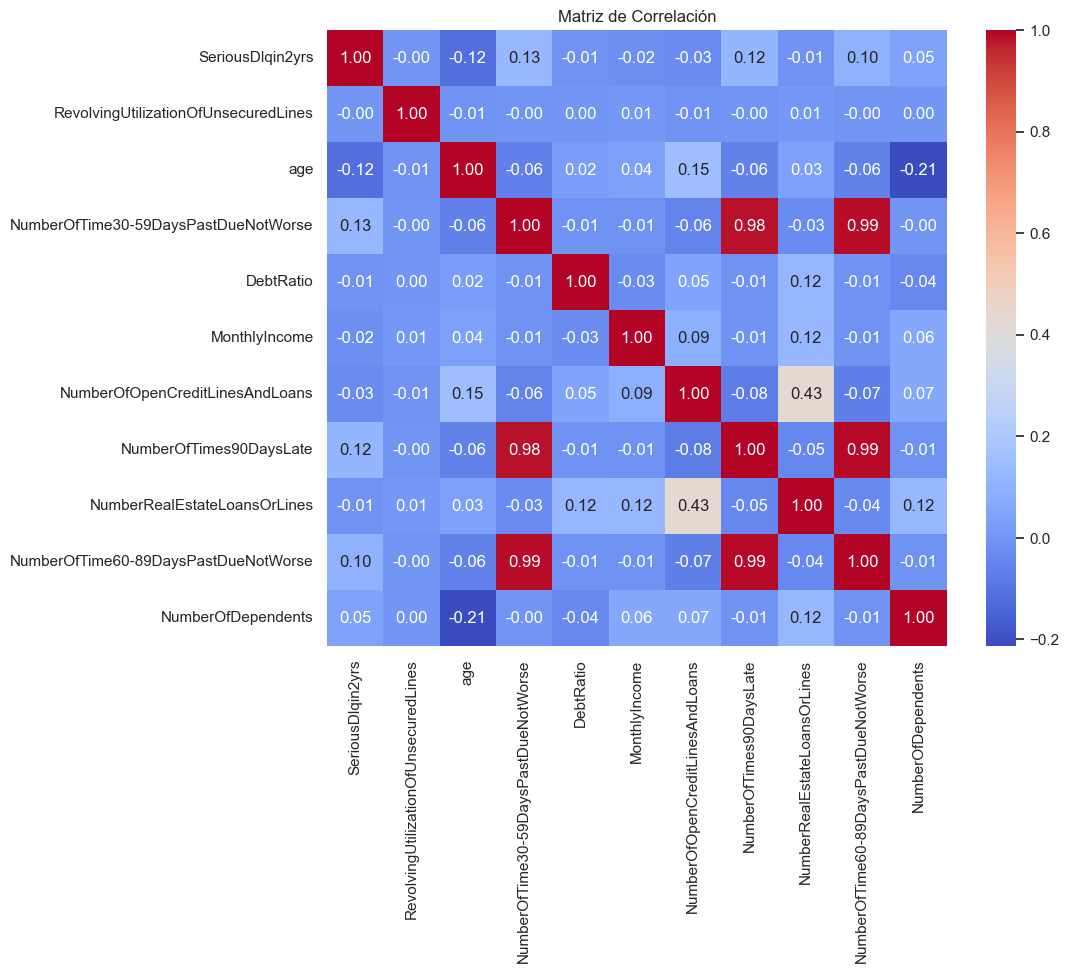

In [14]:
# 🔍 Correlaciones entre variables
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

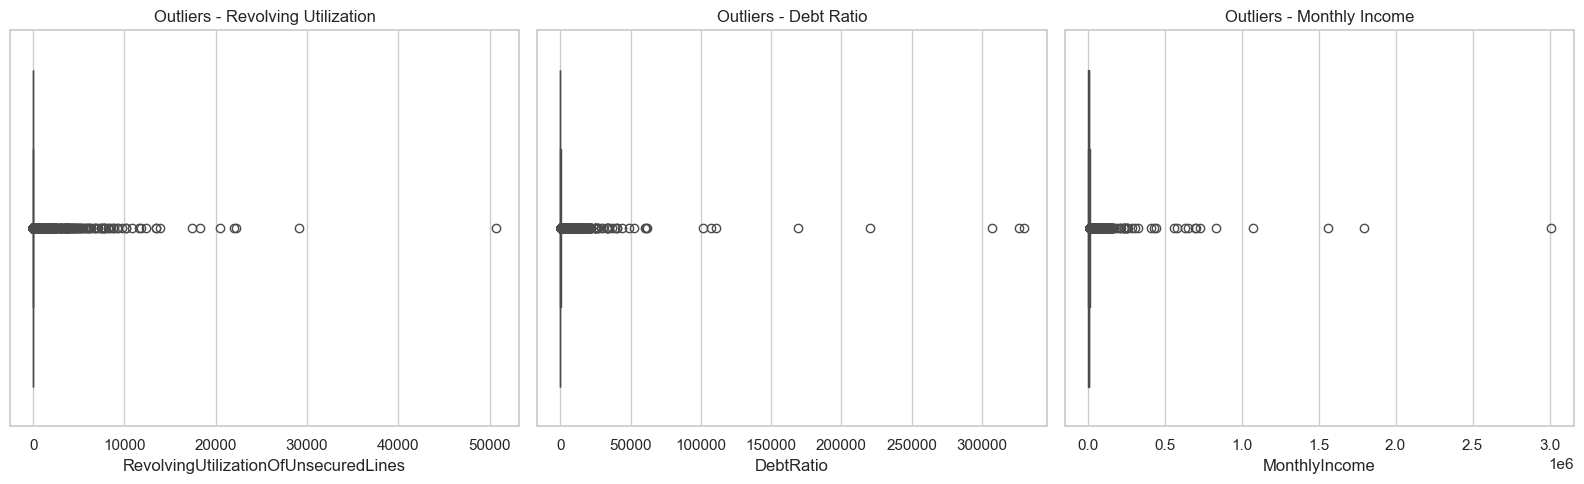

In [18]:
# Ajustes de estilo
sns.set(style="whitegrid")
plt.figure(figsize=(16, 5))

# RevolvingUtilizationOfUnsecuredLines
plt.subplot(1, 3, 1)
sns.boxplot(x=df['RevolvingUtilizationOfUnsecuredLines'])
plt.title('Outliers - Revolving Utilization')

# DebtRatio
plt.subplot(1, 3, 2)
sns.boxplot(x=df['DebtRatio'])
plt.title('Outliers - Debt Ratio')

# MonthlyIncome
plt.subplot(1, 3, 3)
sns.boxplot(x=df['MonthlyIncome'])
plt.title('Outliers - Monthly Income')

plt.tight_layout()
plt.show()
